In [1]:
import pandas as pd
import numpy as np
import scipy 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from random import choices,sample

import os
import gc
import pickle

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

os.chdir("../../")
root_path = os.getcwd()

raw_file_path = os.path.join(root_path, "Bigcon2020_raw_file")
csv_file_path = os.path.join(root_path, "BigCon_2020/csv_files")
pickle_file_path = os.path.join(root_path, "BigCon_2020/pickle_files")
image_path = 'C:/Users/rears/OneDrive/바탕 화면/dacon_covid19/'

raw_file_folders = os.listdir(raw_file_path)

folder_path = os.path.join(raw_file_path, raw_file_folders[4])

In [5]:
file_name=os.listdir(folder_path)[1]

In [6]:
file_path = os.path.join(folder_path, file_name)
cj_deliv = pd.read_excel(file_path)

In [95]:
covid_df = pd.read_csv(os.path.join(csv_file_path,'covid19_일별확진자.csv'))
covid_df['날짜'] = pd.to_datetime(covid_df.날짜)

covid_df = covid_df.iloc[8:129]

In [16]:
cj_deliv['DL_YMD'] = pd.to_datetime(cj_deliv.DL_YMD.apply(lambda x : '20'+str(x)), format='%Y%m%d')

In [18]:
cj_deliv['year'] = cj_deliv.DL_YMD.dt.year.values
cj_deliv['month'] = cj_deliv.DL_YMD.dt.month.values
cj_deliv['weekofyear'] = cj_deliv.DL_YMD.dt.weekofyear.values
cj_deliv['dayofweek'] = cj_deliv.DL_YMD.dt.dayofweek.values

cj_deliv['weekday'] = np.where(cj_deliv.dayofweek < 5, '평일', '주말')

In [49]:
cj_cat_unstack = cj_deliv.groupby(['DL_YMD','CTPV_NM','CTGG_NM','DL_GD_LCLS_NM'])['INVC_CONT'].sum().\
        reset_index().\
        pivot_table(values='INVC_CONT', index=['DL_YMD','CTPV_NM','CTGG_NM'], columns=['DL_GD_LCLS_NM'], aggfunc='sum').\
        reset_index().\
        sort_values(by=['CTPV_NM','CTGG_NM','DL_YMD']).\
        reset_index(drop=True).\
        fillna(0)

In [156]:
tmp_df = cj_deliv.groupby(['DL_YMD','CTPV_NM','CTGG_NM'])['INVC_CONT'].sum().reset_index()
# tmp_df = cj_deliv.groupby(['DL_YMD','CTPV_NM','CTGG_NM','DL_GD_LCLS_NM'])['INVC_CONT'].sum().reset_index()

대구광역시 수성구


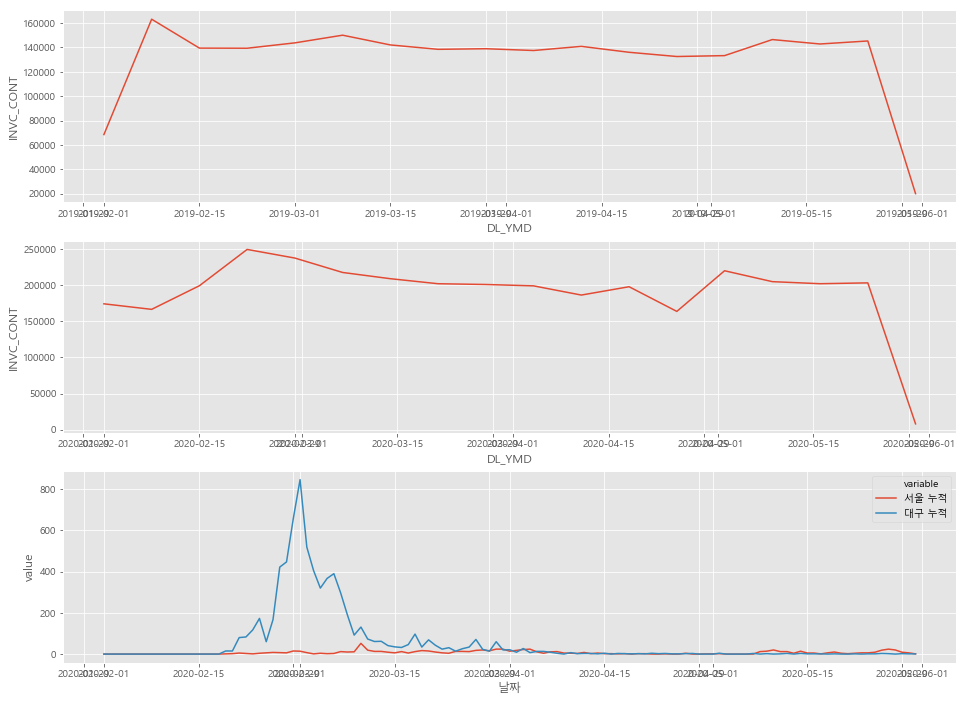

대구광역시 중구


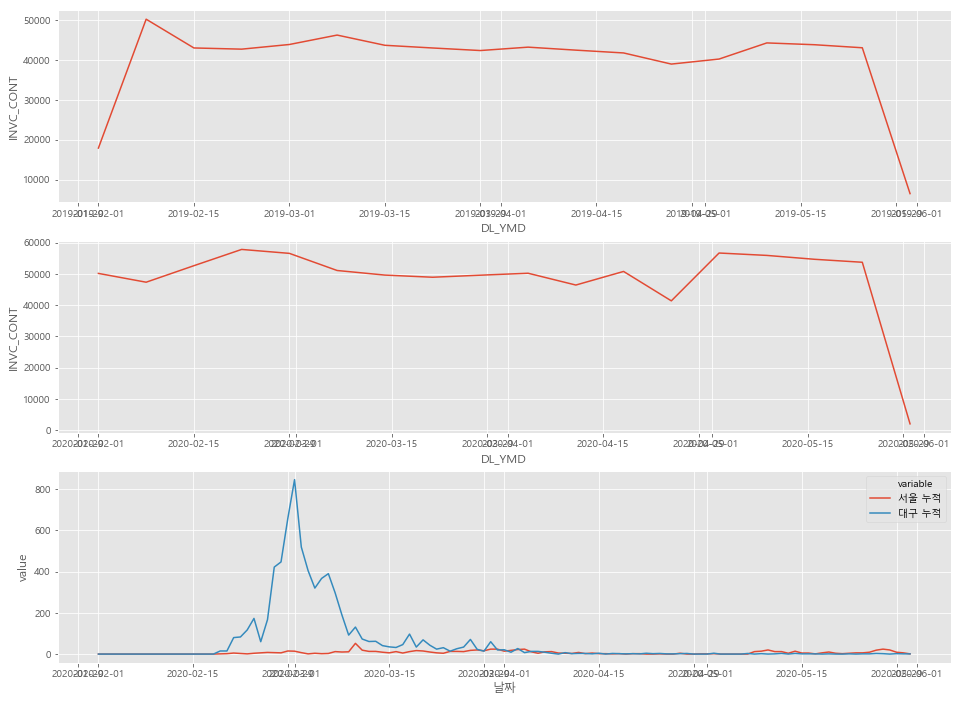

서울특별시 노원구


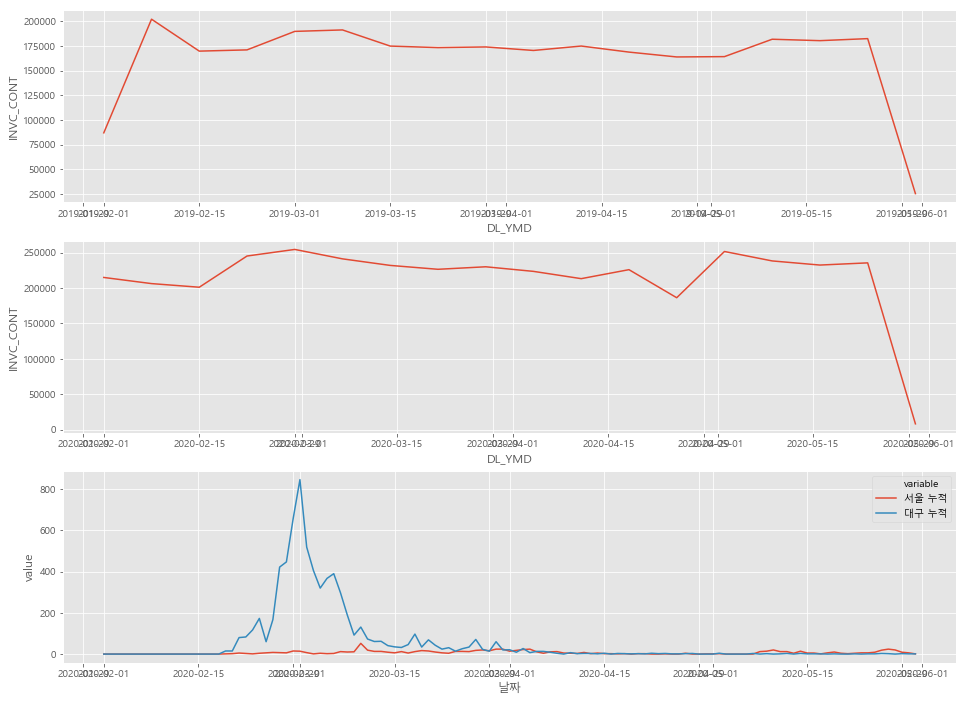

서울특별시 중구


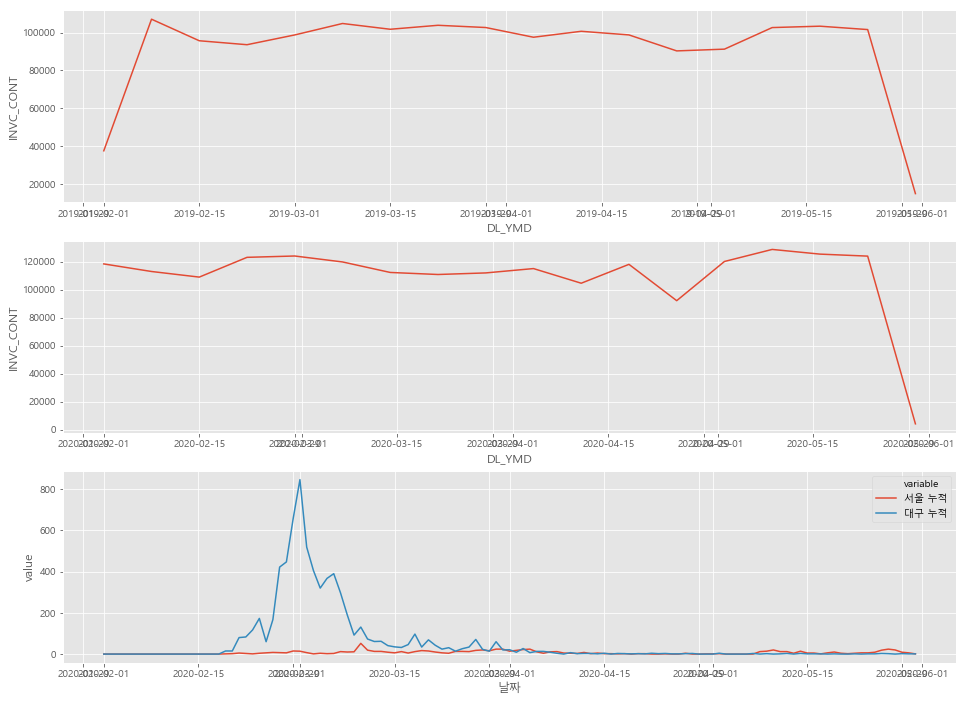

In [162]:
for si,gu in tmp_df.drop_duplicates(['CTPV_NM','CTGG_NM'])[['CTPV_NM','CTGG_NM']].values:
    print(f'{si} {gu}')
    tmp = tmp_df.loc[(tmp_df.CTPV_NM == si) & (tmp_df.CTGG_NM==gu) & (tmp_df.DL_YMD.dt.year==2020)]
    tmp1 = tmp_df.loc[(tmp_df.CTPV_NM == si) & (tmp_df.CTGG_NM==gu) & (tmp_df.DL_YMD.dt.year==2019)]
    
    plt.figure(figsize=(16,12))
    plt.subplot(311)
    sns.lineplot(
        data = tmp1.set_index('DL_YMD').resample('7D').sum().reset_index(),
        x = 'DL_YMD',
        y = 'INVC_CONT',
        #hue = 'DL_GD_LCLS_NM'
    )
    
    plt.subplot(312)
    sns.lineplot(
        data = tmp.set_index('DL_YMD').resample('7D').sum().reset_index(),
        x = 'DL_YMD',
        y = 'INVC_CONT',
        #hue = 'DL_GD_LCLS_NM'
    )
    
    plt.subplot(313)
    sns.lineplot(
        data = covid_df.iloc[:,[0,1,3]].melt(id_vars='날짜'),
        x = '날짜',
        y = 'value',
        hue = 'variable'
    )
    
    plt.show()

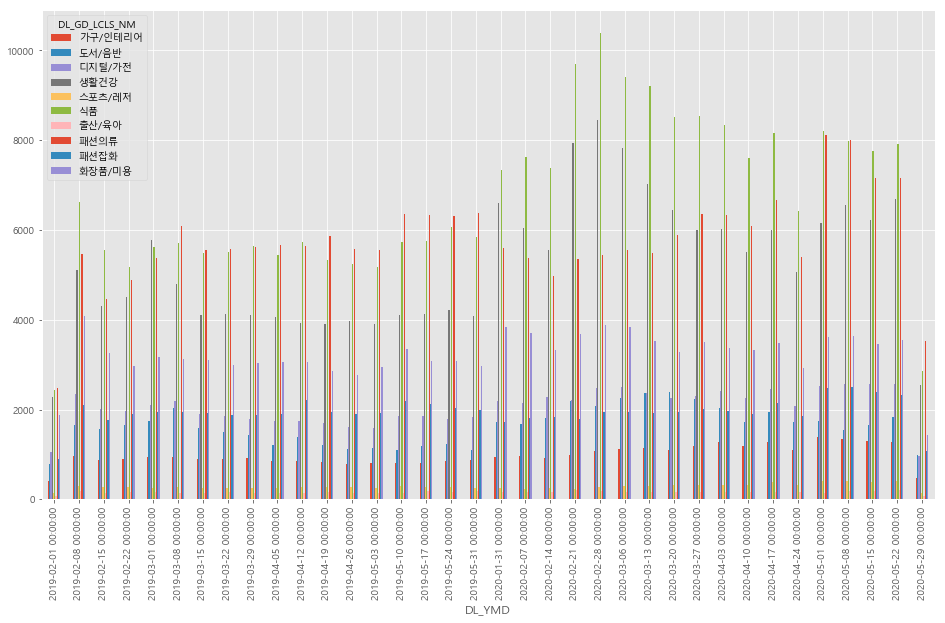

In [70]:
cj_cat_unstack.loc[cj_cat_unstack.CTGG_NM=='노원구'].set_index('DL_YMD').resample('7D').mean().dropna().plot(kind ='bar',figsize=(16,9))

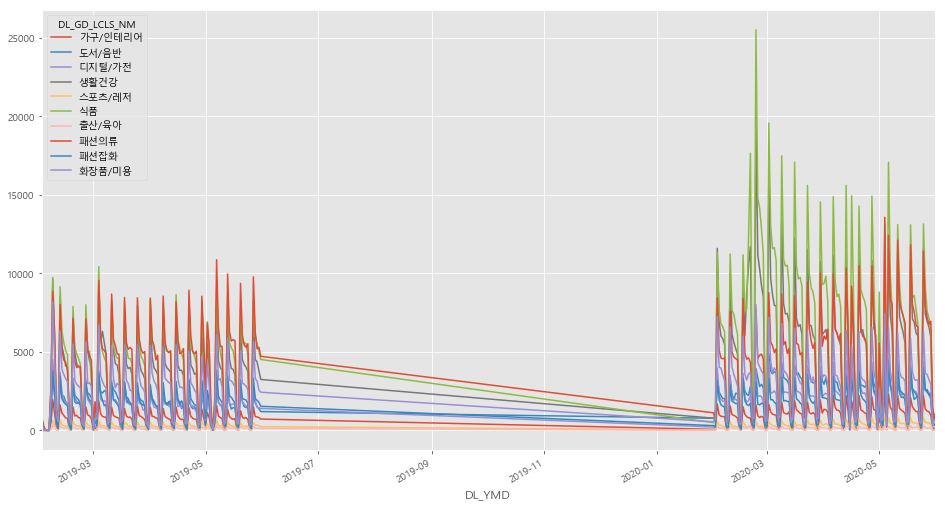

In [54]:
cj_cat_unstack.loc[cj_cat_unstack.CTGG_NM=='수성구'].set_index('DL_YMD').drop(['CTPV_NM','CTGG_NM'], axis=1).plot(figsize=(16,9))

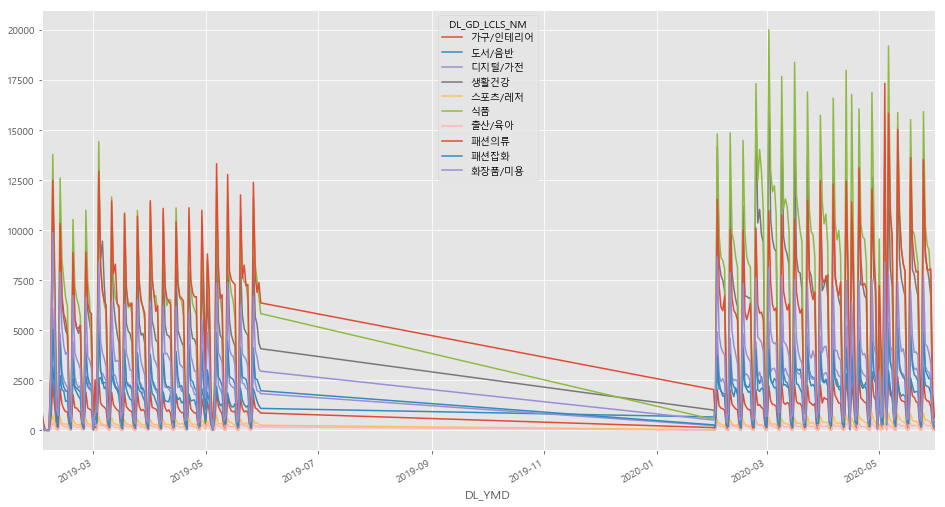

In [55]:
cj_cat_unstack.loc[cj_cat_unstack.CTGG_NM=='노원구'].set_index('DL_YMD').drop(['CTPV_NM','CTGG_NM'], axis=1).plot(figsize=(16,9))